# A Classification Model for Predicting Whether Individuals got their H1N1 Vaccines

## 1. Business Understanding

Vaccination has become a key public health measure that is used to fight and in most cases curb infectious diseases. Vaccines provide immunization for individuals and having a community participate in the process can further decrease the spread of diseases as a result of the concept of "herd immunity." 

Our stakeholders in this case are the researchers, the government and patients who hope to benefit from the predictions made by this model. The idea is to come up with a classification modek that will predict (almost) accurately whether individuals were immunized with H1N1 vacciness. 

### a. Problem Statement

### b. Objectives
Identify which factors affect individuals' response to vaccines

Accurately predict the general response of individuals to a new vaccine

Build a classification model that accurately predicts the response of individuals to new vaccines and provides actionable insights on how to reduce the spread of contagious infections.

### c. Data Understanding

The data used in this project was retrieved from [DrivenData](https://www.drivendata.org/competitions/66/flu-shot-learning/page/210/). The dataset contains data on training features, training labels, test features and the submission format. The data on the training features (the input variables that the model will use to predict the probability that people received H1N1 flu vaccines and seasonal flu vaccines) contains 35 feature columns in total, each a response to a survey question. These questions cover several different topics, such as whether people observed safe behavioral practices, their opinions about the diseases and the vaccines, and their demographics.The data on training labels (the labels corresponding to the observations in the training features) contains two target variables : h1n1_vaccine and seasonal_vaccine. Both are binary variables, with 1 indicating that a person received the respective flu vaccine and 0 indicating that a person did not receive the respective flu vaccine.

### d. metrics of success
Accuracy

Precision

Recall

F1-Score

ROC/AUC curve

## 2. Loading and checking the data

We first start by importing the necessary libaries. 

In [30]:
# numpy for high-level mathematical functions on arrays
import numpy as np
# pandas for tablular data analysis and manipulation
import pandas as pd
# seaborn and matplotlib for data visualization
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#sklearn preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error

# sklearn classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#sklearn evaluation metrics and validation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score,f1_score

Next up, Load the dataset

In [2]:
# previewing the top of our dataset
features_df = pd.read_csv("training_set_features.csv")
features_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [3]:
# checking the bottom of our dataset
features_df.tail()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg
26706,26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,mlyzmhmf,"MSA, Principle City",1.0,0.0,NaN,NaN


In [4]:
# checking the number of records in our dataset
def data_shape(data):
    """Returns the shape of the data"""
    rows = data.shape[0]
    cols = data.shape[1]
    print(f"The dataframe has:\n\t*  {rows} rows\n\t*  {cols} columns")

In [5]:
data_shape(features_df)

The dataframe has:
	*  26707 rows
	*  36 columns


This dataset contains 26707 observations and 36 columns. 

The features dataset contains a combination of floats, integers and object data types. 

In [6]:
# Checking whether each column has an appropriate datatype 
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [7]:
# checking the top of our labels dataset
labels_df = pd.read_csv("training_set_labels.csv")
labels_df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [8]:
# checking the bottom of our labels dataset
labels_df.tail()

,respondent_id,h1n1_vaccine,seasonal_vaccine
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0
26706,26706,0,0


In [9]:
# checking whether the columns have consistent and appropriate data types
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [10]:
# determining the number of records in our labels dataframe
data_shape(labels_df)

The dataframe has:
	*  26707 rows
	*  3 columns


The labels dataframe contains 26707 observations and 3 columns.

In [11]:
# previewing the test dataframe
test_df = pd.read_csv("test_set_features.csv")
test_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [12]:
test_df.tail()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
26703,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,dqpwygqj,"MSA, Principle City",1.0,1.0,NaN,NaN
26704,53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Below Poverty,Married,Rent,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov
26705,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26706,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26707,53414,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,NaN,Not Married,Rent,Employed,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,xtkaffoo


## 4. Data Preparation

Before the data is ready to use, there is need for tidying to ensure consistency, handle missing values, and duplicates.The dataset for one, contains two target variables, the probability that individuals received H1N1 vaccines and seasonal vaccines. For this prject however, the intention is to work with one target variable, the probability of H1N1 vaccine reception, therefore, columns representing the probability of seasonal vaccines will be dropped.

In [13]:
# dropping columns related to seasonal vaccine in the features dataframe
new_features_df = features_df.drop(['doctor_recc_seasonal', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc'], axis=1)
new_features_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [14]:
# dropping columns related to seasonal vaccine in the labels dataframe
new_labels_df = labels_df.drop(['seasonal_vaccine'], axis=1)
new_labels_df.head()

,respondent_id,h1n1_vaccine
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


We now combine the labels and features into one dataframe

In [15]:
# joining the labels and features into one dataframe
joined_df = new_features_df.merge(new_labels_df, on='respondent_id', how='left')
print(joined_df.shape)
joined_df.head()

(26707, 33)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0


In [16]:
# dropping columns related to seasonal vaccine in the test features dataframe
new_test_df = test_df.drop(['doctor_recc_seasonal', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc'], axis=1)
new_test_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


The resulting dataset has 26708 rows and 32 columns

#### Handling missing values
We check for missing values in the new_features_df

In [17]:
# checking for missing values in the dataset
joined_df.isna().sum().sum()

57089

In [18]:
# checking for what percentage of the total data is missing values
def identify_missing_values(data):
    """A simple function to check if data has missing values"""
    # identify the total missing values per column
    # sort in order 
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # store in a dataframe 
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    # remove values that are missing 
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace = True)

    return missing

missing_data = identify_missing_values(joined_df)
missing_data

,Missing Values,Percentage(%)
employment_occupation,13470,0.504362
employment_industry,13330,0.499120
health_insurance,12274,0.459580
income_poverty,4423,0.165612
doctor_recc_h1n1,2160,0.080878
rent_or_own,2042,0.076459
employment_status,1463,0.054780
marital_status,1408,0.052720
education,1407,0.052683
chronic_med_condition,971,0.036358


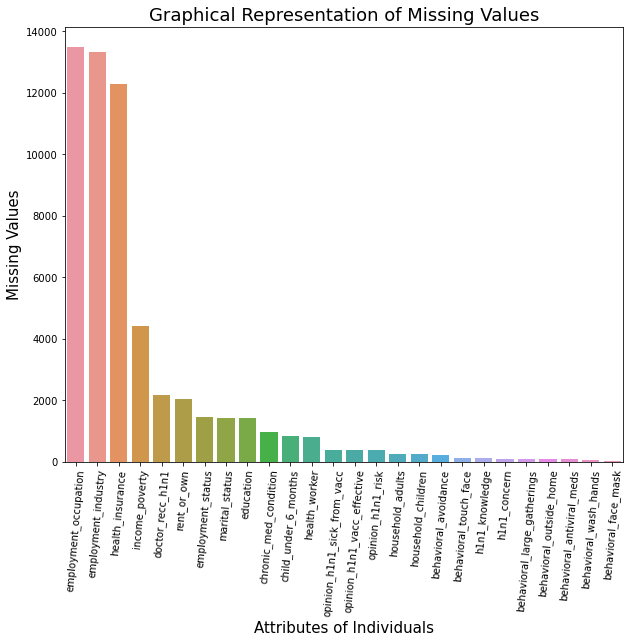

In [19]:
#  graphical representation
fig, axes = plt.subplots(figsize = (10, 8))

# plot a bargraph
sns.barplot(x = missing_data.index , y = missing_data["Missing Values"])
# labeling the axes 
plt.xlabel("Attributes of Individuals", fontsize = 15)
# rotating our xticks 
plt.xticks(rotation = '85')
# labeling the y axis 
plt.ylabel("Missing Values", fontsize = 15)
# title 
plt.title("Graphical Representation of Missing Values", fontsize = 18)
# display
plt.show()


Following the above outcome, the dataset has a very high number of missing values. To handle the missing values, we drop the columns with the missing values above 40% of the data, that is employment_occupation, employment_industry, and health_insurance.

In [20]:
# dropping all the columns with missing values
joined_df = joined_df.drop(['employment_occupation', 'employment_industry', 'health_insurance'], axis=1)
joined_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0


Now we have 30 columns left. For the remaining missing values, we will handle them by filling in the missing values depending on the type of missing values they are.

First, we handle these missing values using the backward-fill method.

In [21]:
# handling missing values in the remaining columns
joined_df.fillna(method="bfill", inplace=True)
joined_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0


In [22]:
# confirm that we have handled all the missing values
joined_df.isna().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_adults               0
household_children             0
h1n1_vaccine                   0
dtype: int

Our data does not contain any more missing values.

In [23]:
# dropping irrelevant colums
joined_df = joined_df.drop(['respondent_id', 'hhs_geo_region'], axis=1)
joined_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


#### cheking for duplicates

In [24]:
# check for duplicates
joined_df.duplicated().any()

True

The dataset has no duplicates

Now we have 28 columns to work with as we move to the EDA section

# 5. Exploratory Data Analysis


In this section, we explore the dataset further to better understand which individuals' attributes are highly related to H1N1 vaccine, and ultimately to build a classification model that can accurately predict whether someone received the H1N1 vaccine based on their measurements. By exploring the data, we may be able to see which variables — or which combination of variables — provide the most information about whether or not the individualgot the vaccine.

We will start by looking at how the features correlate with the target variable.

The response variable for this analysis is h1n1_vaccine.

### Univariate Analysis

We look at the distribution the target variable which in this case is h1n1_vaccine

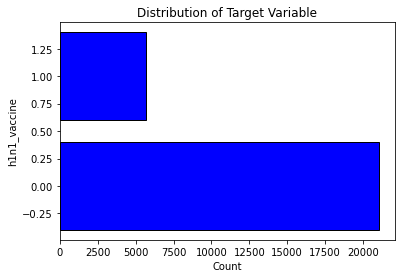

In [25]:
# Select the target column
h1n1_vaccine = joined_df['h1n1_vaccine']

# Get the unique values and their frequency in the target column
unique_values, counts = np.unique(h1n1_vaccine, return_counts=True)

# Create a bar plot
fig, ax = plt.subplots()
ax.barh(unique_values, counts, color='blue', edgecolor='black')

# Set the x-axis label
ax.set_xlabel('Count')

# Set the y-axis label
ax.set_ylabel('h1n1_vaccine')

# Set the title
ax.set_title('Distribution of Target Variable')

# Show the plot
plt.show()

It looks like roughy only about 20% of people received the H1N1 flu vaccine. In terms of class balance,  the H1N1 flu vaccine target has moderately imbalanced classes.

### Bivariate Analysis

We want to see how the features are correlated with the target variable. We'll start with trying to visualize if there is simple bivariate correlation. If a feature is correlated with the target, we'd expect there to be different patterns of vaccination as you vary the values of the feature.
We will start with one feature and the target and work our way up to a prototype, before applying it to more features and the target. We'll use h1n1_knowledge, the level of knowledge a person showed about the H1N1 flu, and h1n1_vaccine as a target variable.

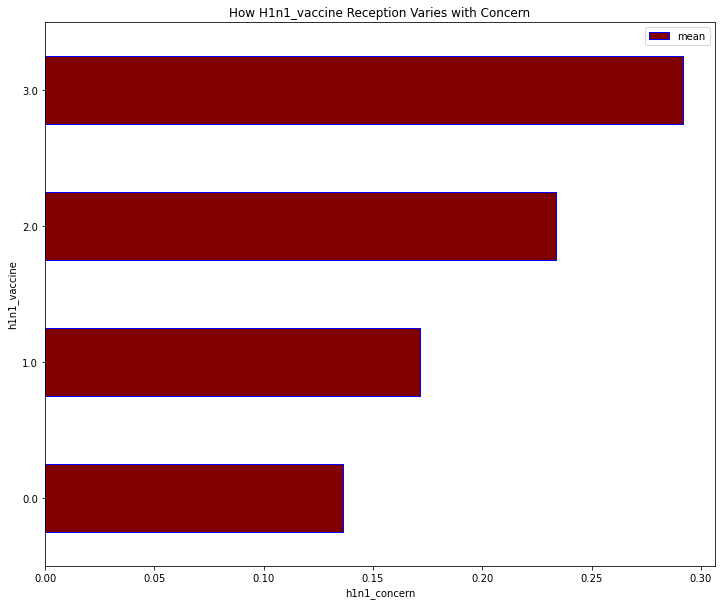

In [26]:
# Plotting h1n1 vaccine proportion in relation to individuals concern
joined_df.groupby('h1n1_concern')['h1n1_vaccine'].agg(['mean']).plot(kind='barh',
                                                                figsize=(12,10),
                                                                color='maroon',
                                                                edgecolor="blue")
plt.xlabel('h1n1_concern')
plt.ylabel('h1n1_vaccine')
plt.title('How H1n1_vaccine Reception Varies with Concern');

It is obvious that even though the majority of people do not receive the H1N1 vaccine, those who are more concerned are more likely to do so. When we come to modeling, it seems like h1n1 concern will be a valuable tool.

We check for the correlation of othe other features with the target variable h1n1_vaccine to determine which variables influence an individual's decision to get the vaccine.

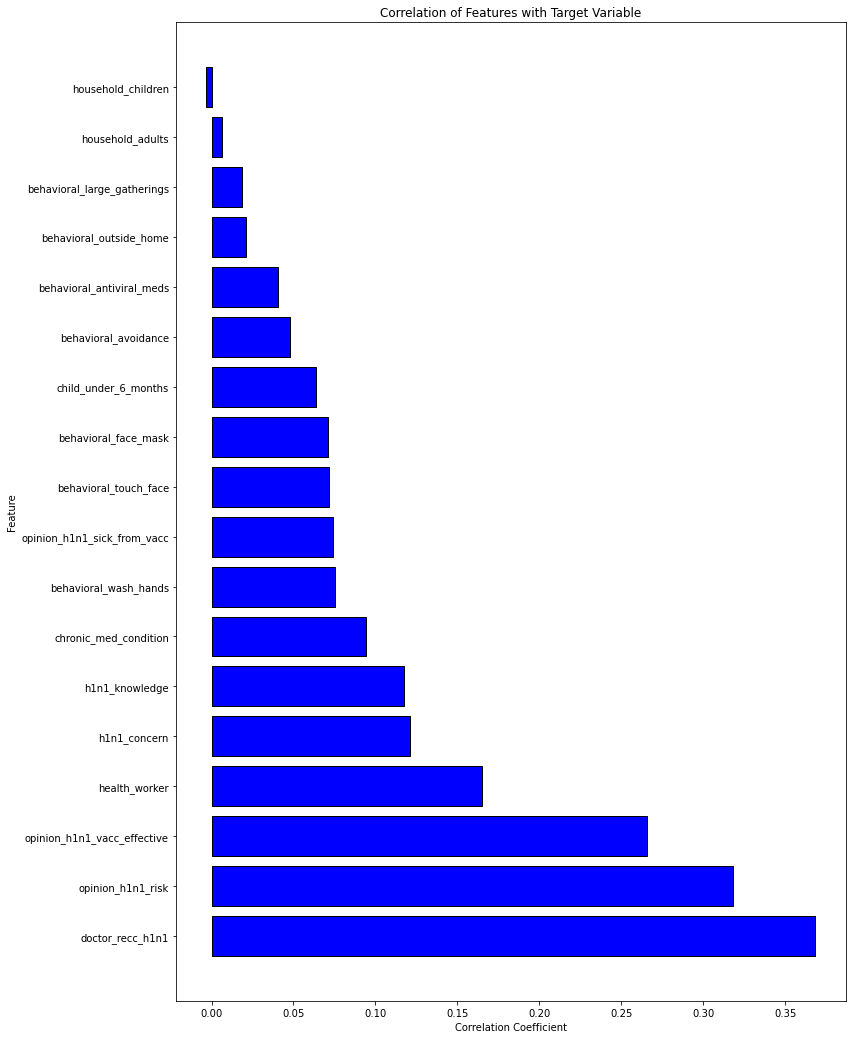

In [27]:
# Select the target column
h1n1_vaccine = joined_df['h1n1_vaccine']

# Compute the correlation between each feature and the target column
corr = joined_df.drop('h1n1_vaccine', axis=1).corrwith(h1n1_vaccine)

# Sort the correlations in descending order
corr = corr.sort_values(ascending=False)

# Plot the correlations as horizontal bar graphs
fig, ax = plt.subplots(figsize=(12, len(corr)*1.0))
ax.barh(corr.index, corr.values, color='blue', edgecolor='black')

# Set the x-axis label
ax.set_xlabel('Correlation Coefficient')

# Set the y-axis label
ax.set_ylabel('Feature')

# Set the title
ax.set_title('Correlation of Features with Target Variable')

# Show the plot
plt.show()

The correlation coefficient is generally not high for most of the variables. However, there are some that are more correlated to the target variable like doctor_recc_h1n1, opinion_h1n1_risk, and opinion_h1n1_vacc_effective. These seem like great variables to work with increase prediction accuracy.

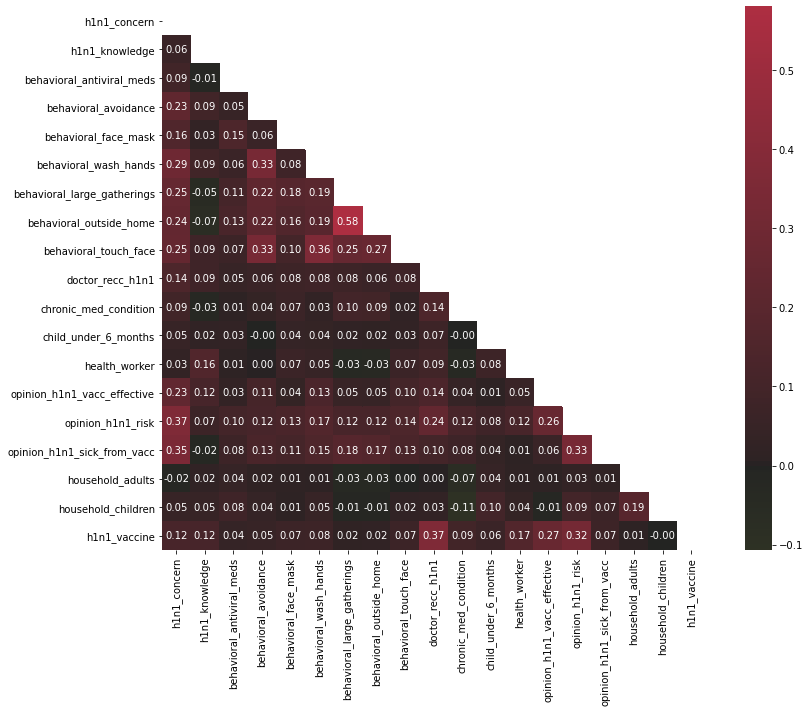

In [28]:
# Triangular correlation heatmap to check which predictors have the highest correlation with the target
# Create a mask
corr = joined_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="dark", as_cmap=True)

plt.figure(figsize=(14,10))
sns.heatmap(corr, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)

plt.show();

The variables behavioral_outside_home and behavioral_large_gatherings seem to be quite highly correlated. This goes against the classification assumption that the features are independent. To ensure better prediction accuracy, these features will be dropped.

## 6. Feature Engineering

First, we split the data to with test size of 30% and random_state=42

In [29]:
# split the data into training and testing data
X = joined_df.drop('h1n1_vaccine',axis = 1)
y = joined_df['h1n1_vaccine']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42, test_size = 0.3)

In [31]:
# # checking categorical predictors
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18694 entries, 5303 to 23654
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 18694 non-null  float64
 1   h1n1_knowledge               18694 non-null  float64
 2   behavioral_antiviral_meds    18694 non-null  float64
 3   behavioral_avoidance         18694 non-null  float64
 4   behavioral_face_mask         18694 non-null  float64
 5   behavioral_wash_hands        18694 non-null  float64
 6   behavioral_large_gatherings  18694 non-null  float64
 7   behavioral_outside_home      18694 non-null  float64
 8   behavioral_touch_face        18694 non-null  float64
 9   doctor_recc_h1n1             18694 non-null  float64
 10  chronic_med_condition        18694 non-null  float64
 11  child_under_6_months         18694 non-null  float64
 12  health_worker                18694 non-null  float64
 13  opinion_h1n1_

The categorical features in this case range from age_group to census_msa. Therefore to be able to use them appropriately in the model, we have to encode them with numerical values. For this we will use label encoder.

In [32]:
# Checking Categorical predictors/features 
display(X_train['age_group'].value_counts())
display(X_train['education'].value_counts())
display(X_train['race'].value_counts())
display(X_train['sex'].value_counts())
display(X_train['marital_status'].value_counts())
display(X_train['rent_or_own'].value_counts())
display(X_train['census_msa'].value_counts())
display(X_train['employment_status'].value_counts())
display(X_train['income_poverty'].value_counts())

65+ Years        4827
55 - 64 Years    3902
18 - 34 Years    3671
45 - 54 Years    3621
35 - 44 Years    2673
Name: age_group, dtype: int64

College Graduate    7463
Some College        5214
12 Years            4270
< 12 Years          1747
Name: education, dtype: int64

White                14885
Black                 1444
Hispanic              1214
Other or Multiple     1151
Name: race, dtype: int64

Female    11137
Male       7557
Name: sex, dtype: int64

Married        10074
Not Married     8620
Name: marital_status, dtype: int64

Own     14236
Rent     4458
Name: rent_or_own, dtype: int64

MSA, Not Principle  City    8139
MSA, Principle City         5469
Non-MSA                     5086
Name: census_msa, dtype: int64

Employed              10072
Not in Labor Force     7560
Unemployed             1062
Name: employment_status, dtype: int64

<= $75,000, Above Poverty    10748
> $75,000                     5715
Below Poverty                 2231
Name: income_poverty, dtype: int64

In [34]:
# Converting the non-numerical labels into numerical in the X_train data
label_encoder = LabelEncoder()

X_train['age_group'] = label_encoder.fit_transform(X_train['age_group'])
X_train['education'] = label_encoder.fit_transform(X_train['education'])
X_train['race'] = label_encoder.fit_transform(X_train['race'])
X_train['sex'] = label_encoder.fit_transform(X_train['sex'])
X_train['marital_status'] = label_encoder.fit_transform(X_train['marital_status'])
X_train['rent_or_own'] = label_encoder.fit_transform(X_train['rent_or_own'])
X_train['census_msa'] = label_encoder.fit_transform(X_train['census_msa'])
X_train['employment_status'] = label_encoder.fit_transform(X_train['employment_status'])
X_train['income_poverty'] = label_encoder.fit_transform(X_train['income_poverty'])

# Preview the top of the data
X_train.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children
5303,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,2,3,1,1,0,0,1,1,1.0,0.0
2703,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,1,1,2,1,1,0,1,1.0,0.0
6586,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2,3,0,1,1,1,0,0,2.0,0.0
22563,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,1,1,0,0,0,1,1.0,2.0
2338,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,2,3,1,0,1,0,1,0,0.0,0.0


The categorical feature values have been represented by unique values that appropriately represent each one using values such as 0,1,2,3 and 4.


We also label encode the categorical variables in the test data to ensure prevent class imbalance when we fit the model

In [36]:
# Converting the non-numerical labels into numerical in the X_test data
label_encoder = LabelEncoder()

X_test['age_group'] = label_encoder.fit_transform(X_test['age_group'])
X_test['education'] = label_encoder.fit_transform(X_test['education'])
X_test['race'] = label_encoder.fit_transform(X_test['race'])
X_test['sex'] = label_encoder.fit_transform(X_test['sex'])
X_test['marital_status'] = label_encoder.fit_transform(X_test['marital_status'])
X_test['rent_or_own'] = label_encoder.fit_transform(X_test['rent_or_own'])
X_test['census_msa'] = label_encoder.fit_transform(X_test['census_msa'])
X_test['employment_status'] = label_encoder.fit_transform(X_test['employment_status'])
X_test['income_poverty'] = label_encoder.fit_transform(X_test['income_poverty'])

# Preview the top of the data
X_test.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children
15772,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0,3,0,0,0,0,1,1,1.0,0.0
9407,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0,3,1,0,0,0,0,1,1.0,1.0
16515,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,2,3,0,0,1,0,0,0,0.0,1.0
23353,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2,3,0,1,0,0,0,2,1.0,2.0
10008,1.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,2,3,1,1,0,0,0,1,1.0,0.0


Now both the categorical values in the train and test data have been encoded. We now normalize and regularize them. We carry out these process separately for the train and test data to prevent data leakage.

In [38]:
# Standardizing the data
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)
X_test_transformed = scale.transform(X_test)

We will now fit the ridge and lasso regression models to the transformed training data.

## 7. Modeling

### Building a Baseline Model

For our baseline model, we will build a simple logistic regression model

In [56]:
# fit the logistic regression model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='sag')
model_log = logreg.fit(X_train_transformed, y_train)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='sag')

Next, let's generate predictions for both the training and test sets:

### Model Evaluation

#### Performance on training dataset

0    13415
1     5279
Name: Residuals (counts), dtype: int64

0    0.71761
1    0.28239
Name: Residuals (proportions), dtype: float64


Our classifier is 71% correct on our training data!

ValueError: operands could not be broadcast together with shapes (18694,) (26707,) 

#### Performance on testing data

0    13415
1     5279
Name: Residuals (counts), dtype: int64

0    0.71761
1    0.28239
Name: Residuals (proportions), dtype: float64


### Feature Selection

In order to build the best performing model, we need to use the most appropriate features in terms of correlation with the target variable. Additionally, for optimum results, we will not use all features as too many features can be quite cumbersome to use and may more often than not lead to overfitting.

Following the heatmap plotted in the previous section, two specific features exuded strong multicolinearity. For this reason, we drop one of them. Because of their strong correlation, we will only need one for the model.

In [ ]:
# # dropping the behavioral_large_gatherings column
# X_train = X_train.drop(['behavioral_large_gatherings'], axis=1)
# X_train.head()

We can proceed to explore a different option to establish the features that our model will be better off without. We will do this by applying the sklearn SelectKBest method.

In [ ]:
# # import the necessary libraries
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2, SelectPercentile

# selector = SelectKBest(score_func=chi2, k=10)
# X_train_new = selector.fit_transform(X_train, y_train)


# print("Original number of features:", X_train.shape[1])
# print("Reduced number of features:", X_train_new.shape[1])

In [ ]:
# # Checking for the features that have been selected
# df = pd.DataFrame({'columns': X_train.columns,
#                     'scores': selector.scores_,
#                    'selected': selector.get_support()})
# df

In [ ]:
# # checking for the number of features in our new dataset
# X_train_new.shape

In [ ]:
# # checking our new dataset type
# X_train_new

Since our new dataset is a numpy array, we have to convert it back to a pandas dataframe in order to work on it

In [ ]:
# # Converting our dataset into a pandas dataframe
# X_train_new = pd.DataFrame(X_train, columns=['h1n1_concern','h1n1_knowledge', 'behavioral_face_mask', 'doctor_recc_h1n1', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc'])
# X_train_new.head()

### Building the Baseline Model

For the baseline model, we will use a simple logistic regression model.

In [ ]:
# # first create an instance of the LogisticRegression
# logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='sag')
# model_log = logreg.fit(X_train_new, y_train)
# model_log

### Model Evaluation

Now we evaluate how this simple model performs 

#### How it performs on the train dataset

In [ ]:
# # testing how the model performs on training data
# y_hat_train = logreg.predict(X_train_new)

# train_residuals = np.abs(y_train - y_hat_train)
# print(pd.Series(train_residuals, name="Residuals (counts)").value_counts())
# print()
# print(pd.Series(train_residuals, name="Residuals (proportions)").value_counts(normalize=True))

Our classifier is about 78% correct on our training data!

#### How it performs on the test data

In [ ]:
# # preview the test data
# X_test.head()

To be able to fit it to the model, we need to apply same preprocessing process to our test data as we did to the training data to see how the model performs on unseen data

In [ ]:
# X_test.drop(['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'census_msa','household_adults', 'household_children'], axis=1)

In [ ]:
# # Match the colums with those in the training dataset
# X_test_new = 